In [1]:
from google.colab import files
uploaded = files.upload()
%ls

Saving test_inputs.csv to test_inputs.csv
Saving test_labels.csv to test_labels.csv
Saving train_inputs.csv to train_inputs.csv
Saving train_labels.csv to train_labels.csv
sample_data/     test_labels.csv   train_labels.csv
test_inputs.csv  train_inputs.csv


In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score

In [3]:
def load_knn_data():
  test_inputs = np.genfromtxt('test_inputs.csv', delimiter=',')
  test_labels = np.genfromtxt('test_labels.csv', delimiter=',')
  train_inputs = np.genfromtxt('train_inputs.csv', delimiter=',')
  train_labels = np.genfromtxt('train_labels.csv', delimiter=',')
  return train_inputs, train_labels, test_inputs, test_labels

In [4]:
def predict_knn(x, inputs, labels, k_neighbours):  
  l2_distances = np.sum((inputs - x) ** 2, 1)
  indices = np.argsort(l2_distances)
  neighbour_labels = labels[indices[range(k_neighbours)]]
  unique_labels, counts = np.unique(neighbour_labels, return_counts=True)
  best_index = np.argmax(counts)
  predicted_label = unique_labels[best_index]
  return predicted_label

In [5]:
def eval_knn(inputs, labels, train_inputs, train_labels, k_neighbours):
  predicted_labels=np.zeros(len(labels))
  for i in range(len(inputs)):
    predicted_labels[i] = predict_knn(inputs[i],train_inputs,train_labels,k_neighbours)
  accuracy = accuracy_score(predicted_labels, labels)
  
  return accuracy

In [9]:
def cross_validation_knn(k_folds, hyperparameters, inputs, labels):
  fold_size = len(labels)/k_folds
  accuracies = np.zeros(len(hyperparameters))
  for id, hyperparam in enumerate(hyperparameters):
    for fold in range(k_folds):
      validation_inputs = inputs[int(round(fold*fold_size)):
                                 int(round((fold+1)*fold_size))]
      # print(len(validation_inputs))
      validation_labels = labels[int(round(fold*fold_size)):
                                 int(round((fold+1)*fold_size))]
      # print((validation_labels))
      train_inputs = np.concatenate((inputs[:int(round(fold*fold_size))],
                                     inputs[int(round((fold+1)*fold_size)):]))
      train_labels = np.concatenate((labels[:int(round(fold*fold_size))],
                                     labels[int(round((fold+1)*fold_size)):]))
      accuracies[id] += eval_knn(validation_inputs, validation_labels, 
                                 train_inputs, train_labels, hyperparam)
  accuracies /= k_folds
  best_accuracy = np.max(accuracies)
  best_hyperparam = hyperparameters[np.argmax(accuracies)]
  return best_hyperparam, best_accuracy, accuracies

In [7]:
def plot_knn_accuracies(accuracies,hyperparams):
  plt.plot(hyperparams,accuracies)
  plt.ylabel('accuracy')
  plt.xlabel('k neighbours')
  plt.show()  

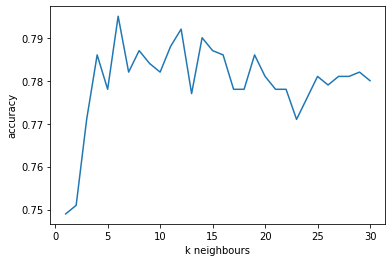

best # of neighbours k: 6
best cross validation accuracy: 0.795
test accuracy: 0.7818181818181819


In [10]:
# load data
train_inputs, train_labels, test_inputs, test_labels = load_knn_data()

# number of neighbours to be evaluated by cross validation
hyperparams = range(1,31)
k_folds = 10
best_k_neighbours, best_accuracy, accuracies = cross_validation_knn(k_folds, 
                                                                    hyperparams, 
                                                                    train_inputs, 
                                                                    train_labels)

# plot results
plot_knn_accuracies(accuracies, hyperparams)
print('best # of neighbours k: ' + str(best_k_neighbours))
print('best cross validation accuracy: ' + str(best_accuracy))

# evaluate with best # of neighbours
accuracy = eval_knn(test_inputs, test_labels, train_inputs, 
                    train_labels, best_k_neighbours)
print('test accuracy: '+ str(accuracy))